In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
# sys.path.insert(1, '/scr/gmachi/prospection/K2/src')
sys.path.insert(1, '/oak/stanford/groups/paragm/gautam/prospection/K2/src')
from utils import deserialize, serialize, deserialize_model

## Select top models 

In [3]:
import pandas as pd
# df = pd.read_csv("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/model_select/model_select_filtered_final.csv")
df = pd.read_csv("/oak/stanford/groups/paragm/hazy_backup/code/gmachi/prospection/K2/notebooks/spatial-bio/outputs/model_select/model_select_filtered_final.csv")

In [4]:
pd.set_option('display.max_rows', 50)

In [5]:
df.sort_values(by="disps", ascending=True).head(50)

,Unnamed: 0,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
60,517,dummy_500-1000_3,546,0.143824,0.004762,1.000000,0.884083,0.764706,0.951119,0.875817,0.915123,0.823529,0.927900,0.843137,0.955592,0.843137,synthetic
55,505,dummy_1-1000_3,534,0.103076,0.006969,1.000000,0.945141,0.901961,0.917135,0.830065,0.889752,0.862745,0.878893,0.764706,0.932143,0.875000,synthetic
59,515,dummy_200-500_10,544,0.235240,0.007463,1.000000,0.896605,0.784314,0.974795,0.938976,0.942006,0.862745,0.937097,0.862745,0.911491,0.843137,synthetic
58,513,dummy_100-200_25,542,0.277814,0.016458,1.000000,0.947692,0.921569,0.965604,0.903937,0.930556,0.901961,0.916129,0.843137,0.933230,0.823529,synthetic
54,503,dummy_1-500_10,532,0.175507,0.018100,1.000000,0.863487,0.784314,0.957467,0.893701,0.890323,0.823529,0.885522,0.755102,0.978992,0.911111,synthetic
57,512,dummy_100-200_10,541,0.122500,0.051355,1.000000,0.918210,0.784314,0.935532,0.868110,0.937888,0.921569,0.919753,0.862745,0.938272,0.843137,synthetic
53,501,dummy_1-200_25,530,0.211014,0.086817,1.000000,0.895385,0.784314,0.953202,0.888189,0.962171,0.901961,0.925926,0.854167,0.950000,0.820513,synthetic
56,510,dummy_50-100_25,539,0.170622,0.147541,1.000000,0.893092,0.823529,0.955338,0.879528,0.928571,0.803922,0.970679,0.882353,0.859532,0.816327,synthetic
52,498,dummy_1-100_25,527,0.121660,0.323741,1.000000,0.948276,0.862745,0.930103,0.852756,0.942547,0.823529,0.904762,0.863636,0.934211,0.888889,synthetic
8,42,k15_r4_alpha0.0500_tau0.00_lamnan,46,0.295337,0.433155,0.118288,0.937888,0.882353,0.990275,0.943994,0.988045,0.956693,0.996581,0.948454,0.993827,0.981481,prospected


In [6]:
IDX = 41
df[df["idx"] == IDX] 

,Unnamed: 0,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
6,37,k12_r5_alpha10000000000.0000_tau1.00_lamnan,41,0.103891,3.2,0.897959,0.996894,0.960784,0.978849,0.932501,0.98195,0.936978,0.996629,0.979487,1.0,1.0,prospected


In [7]:
model_str = df[df["idx"] == IDX]["model"].values[0] + ".model"
model_str

'k12_r5_alpha10000000000.0000_tau1.00_lamnan.model'

In [8]:
# model_str = "k14_r2_alpha0.0500_tau0.00_lamnan.model"
# model_str = "k12_r5_alpha10000000000.0000_tau1.00_lamnan.model"
# model_str = "k14_r5_alpha10000000000.0000_tau1.00_lamnan.model"
# model_str = "k12_r1_alpha0.0500_tau0.00_lamnan.model"
# model_str = "k13_r3_alpha10000000000.0000_tau1.00_lamnan.model"
# model_str = "k15_r1_alpha0.0500_tau0.00_lamnan.model"

In [9]:
# model_dir = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results_final/k2models"
# G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/"
model_dir = "/oak/stanford/groups/paragm/hazy_backup/code/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results_final/k2models"
G_dir = "/oak/stanford/groups/paragm/hazy_backup/data_envs/gmachi/datasets/celldive_lung/for_ml/for_prospect_final"
model_path = os.path.join(model_dir, model_str)
# label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_path = "/oak/stanford/groups/paragm/hazy_backup/data_envs/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

In [11]:
model = deserialize_model(model_path)

/oak/stanford/groups/paragm/gautam/envs/kkenv/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.3.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Zero shot classification
Skipping for now. These sprite embeddings are only frequency counts and it may be silly to use them as is for classification. The idea is that certain patterns are more important so some of these embedding dimensions are not helpful to compute distances. Maybe we can rewight cosine distance to use the Beta coefficients. For now, not a model selection criteria.

In [12]:
# G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/"
# ys, y_hats = [], []
# for G in os.listdir(G_dir):
#     ID = int(G.split(".")[0].split("S")[1])
#     G = os.path.join(G_dir, G)
#     G = deserialize(G)
#     y = label_dict[ID]

#     sprite = model.construct_sprite(G)
#     g = model.embed_sprite(sprite)
#     y_hat = model.zero_shot_classifier(g)
    
#     print("pred, label:", y_hat, y)

#     ys.append(y)
#     y_hats.append(y_hat)

In [13]:
# from sklearn.metrics import accuracy_score
# accuracy_score(ys, y_hats)

## Prospect

In [14]:
# model = deserialize_model(model_path)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


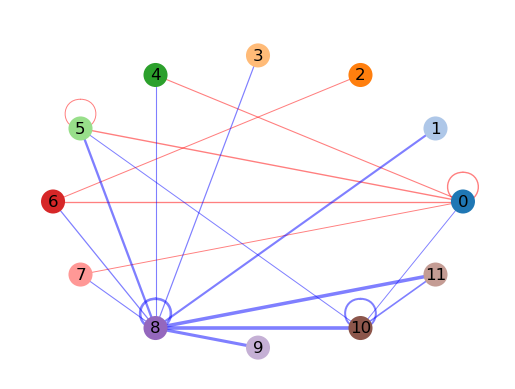

In [15]:
model.visualize_motif_graph(labels=True) 

In [18]:
# model.w_hmap

In [16]:
import matplotlib.pyplot as plt
betas = model.w_hmap
betas_pos = {}
for b in betas.items():
    if b[1] > 0:
        betas_pos[b[0]] = b[1]
        
# print(len(betas_pos.keys()))
for b in betas_pos.items():
    print(b)

# plt.bar(list(range(len(betas))), betas.values())

((0, 0), np.float64(1.4711030649876788))
((0, 4), np.float64(1.1652518097345808))
((0, 5), np.float64(1.4550404199749143))
((0, 6), np.float64(1.389031882780364))
((0, 7), np.float64(1.0104830736962294))
((2, 6), np.float64(1.074217730661838))
((5, 5), np.float64(1.054880854408752))


In [17]:
# plt.bar(list(range(len(betas_pos))), betas_pos.values())

In [18]:
{k: v for k, v in sorted(betas_pos.items(), key=lambda item: item[1], reverse=True)}


{(0, 0): np.float64(1.4711030649876788),
 (0, 5): np.float64(1.4550404199749143),
 (0, 6): np.float64(1.389031882780364),
 (0, 4): np.float64(1.1652518097345808),
 (2, 6): np.float64(1.074217730661838),
 (5, 5): np.float64(1.054880854408752),
 (0, 7): np.float64(1.0104830736962294)}

In [19]:
# from utils import visualize_kernel_chord
# visualize_kernel_chord(betas)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


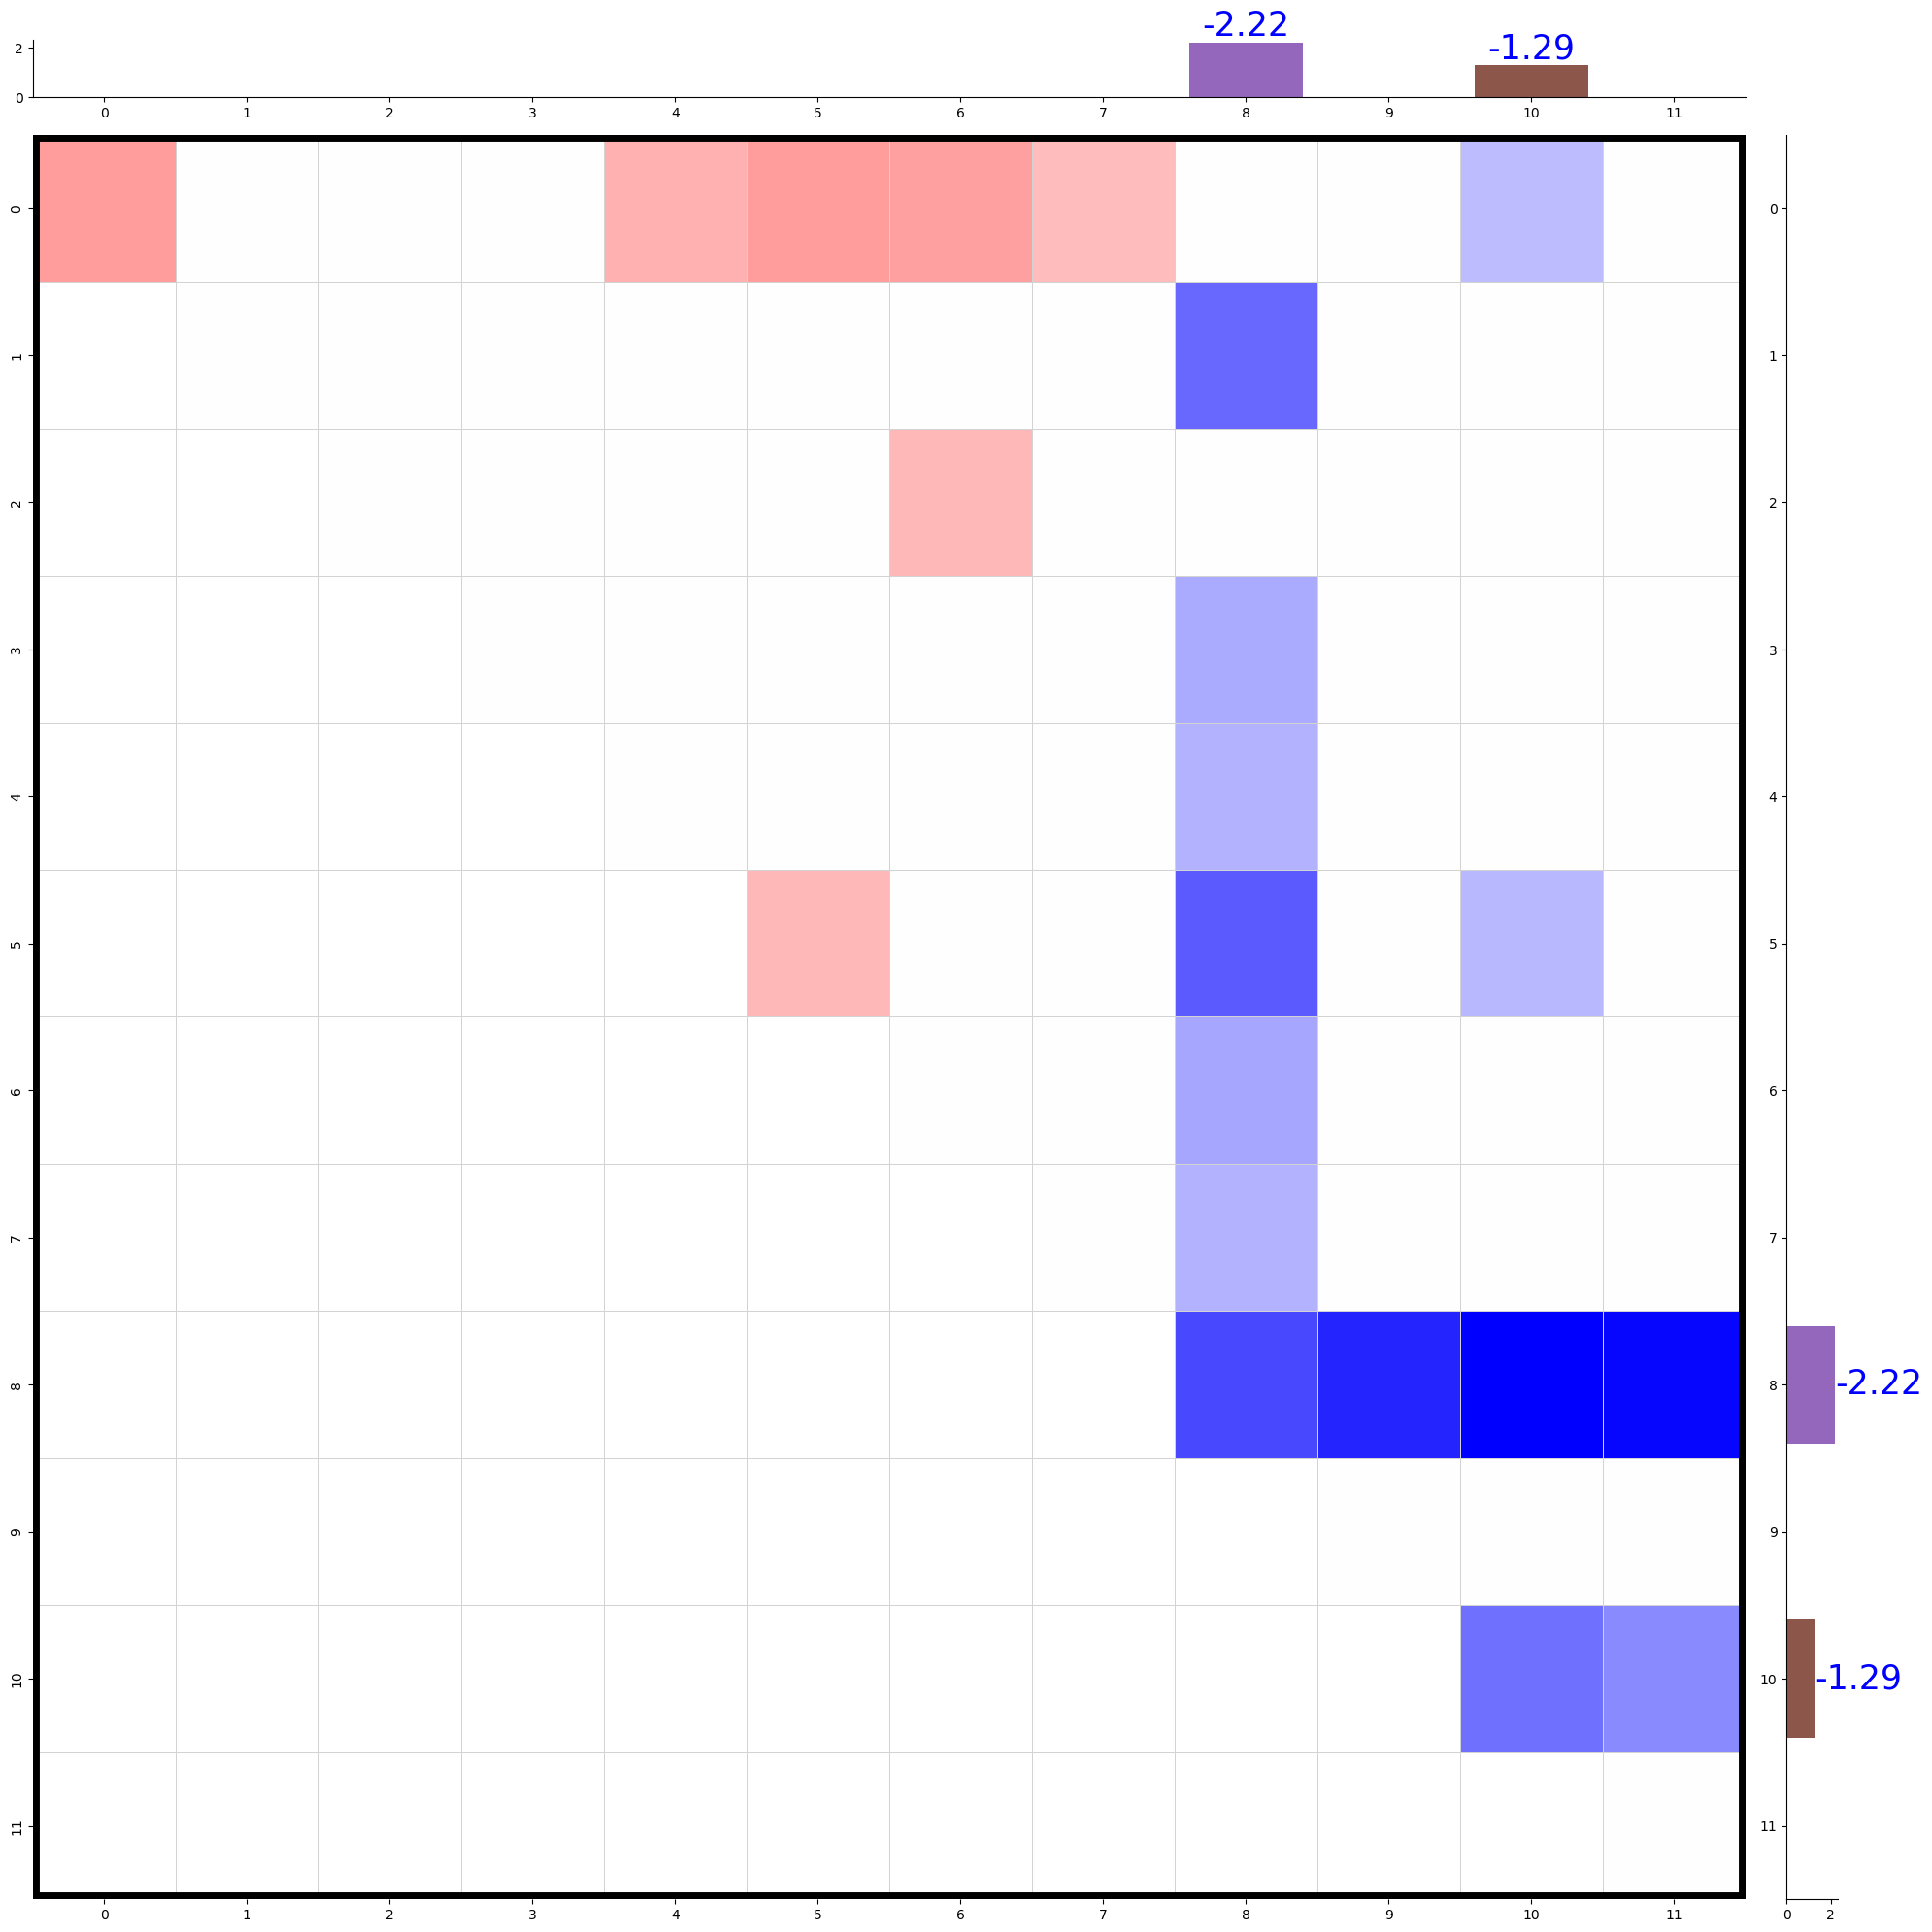

In [20]:
model.visualize_motif_graph(style="matrix")

## Let's get frequencies of monograms and bigrams

In [21]:
# model.create_train_array()

In [22]:
# X = model.training_data
# y = model.labels

In [23]:
import numpy as np
# cache_dir = "/scr/biggest/gmachi/datasets/celldive_lung/top_model_results_final/old_top_model_results_final"
cache_dir = "/oak/stanford/groups/paragm/hazy_backup/data_envs/gmachi/datasets/celldive_lung/top_model_results_final/old_top_model_results_final"
# "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/top_model_results_final"
# np.save(os.path.join(cache_dir, "X_raw.npy"), X)
# np.save(os.path.join(cache_dir, "y_raw.npy"), y)
X = np.load(os.path.join(cache_dir, "X_raw.npy"))
y = np.load(os.path.join(cache_dir, "y_raw.npy"))

In [24]:
species = [str(s) for s in model.w_hmap.keys()]
y = y.astype(int)
X0 = X[y==0,:]
X1 = X[y==1,:]
sum0 = np.sum(X0, axis=0)
sum1 = np.sum(X1, axis=0)

In [25]:
n1 = np.sum(y)
n0 = len(y) - n1

<Figure size 640x480 with 0 Axes>

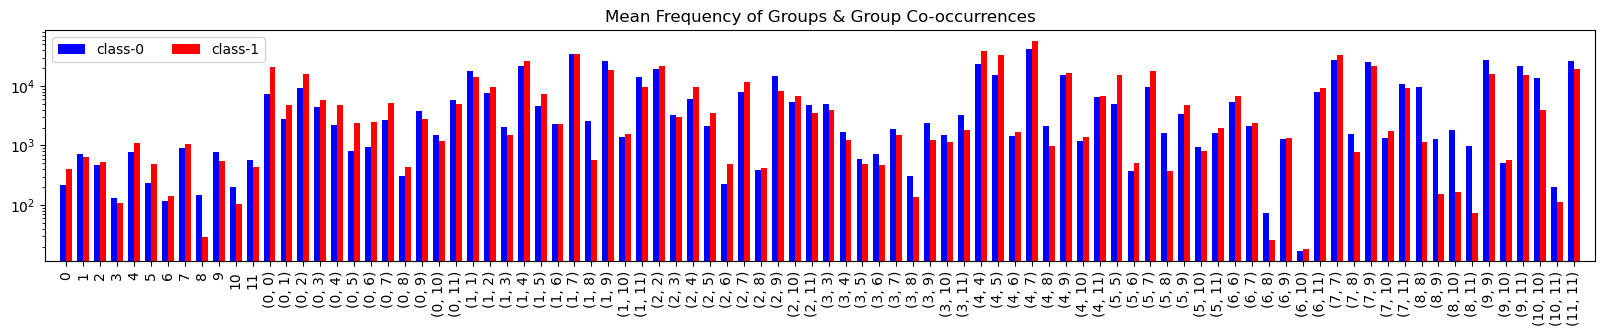

In [26]:
import matplotlib.pyplot as plt

x = np.arange(len(species))  # the label locations
species_sums = {
    "class-0": sum0 / n0,
    "class-1": sum1 / n1
}

width = 0.35  # the width of the bars
multiplier = 0

colors = ["blue", "red"]
plt.figure()
fig, ax = plt.subplots(figsize=(20, 3))
for attribute, measurement in species_sums.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, align='edge', color=colors[multiplier])
    # ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Mean frequency')
ax.set_title('Mean Frequency of Groups & Group Co-occurrences')
ax.set_xticks(x + width, species, rotation=90)
ax.legend(loc='upper left', ncols=2)
# ax.set_ylim(0, 250)
# ax.set_xlim()
ax.set_yscale("log")
plt.margins(x=0.01)
plt.show()


/tmp/ipykernel_25117/966072040.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=18)  # y-tick fontsize


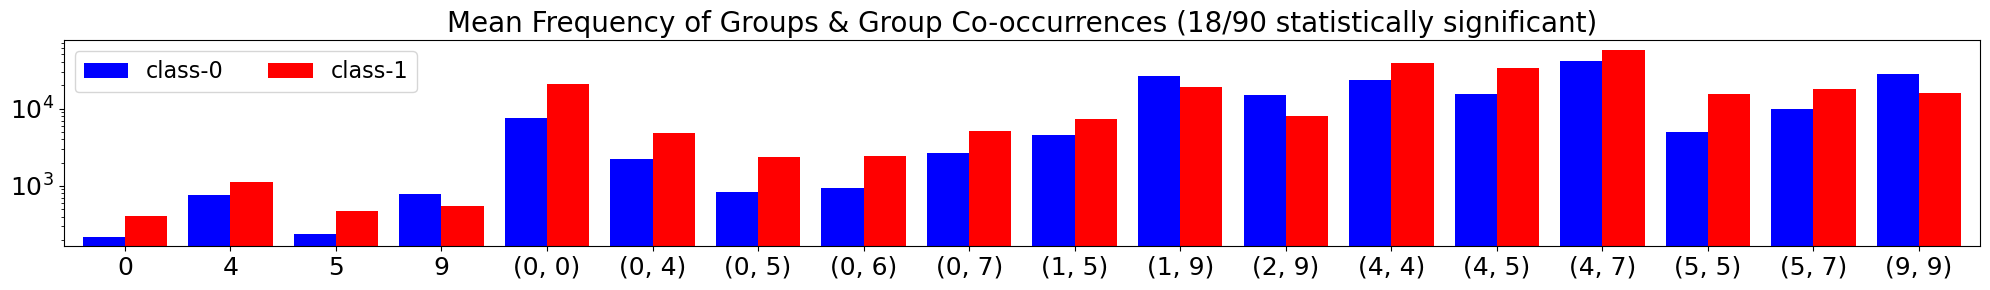

In [44]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests  # optional

X = np.load(os.path.join(cache_dir, "X_raw.npy"))
y = np.load(os.path.join(cache_dir, "y_raw.npy")).astype(int)
species = [str(s) for s in model.w_hmap.keys()]

# split by class
X0, X1 = X[y == 0, :], X[y == 1, :]

# --- significance per feature ---
tvals, pvals = ttest_ind(X0, X1, axis=0, equal_var=False, nan_policy='omit')

alpha = 0.05
use_fdr = True
if use_fdr:
    _, pvals_corr, _, _ = multipletests(pvals, alpha=alpha, method='fdr_bh')
    sig_mask = pvals_corr < alpha
else:
    sig_mask = pvals < alpha

# keep only significant features
species_sig = [s for s, keep in zip(species, sig_mask) if keep]
if len(species_sig) == 0:
    print("No features passed the significance threshold.")
    species_sig = []
X0_sig = X0[:, sig_mask]
X1_sig = X1[:, sig_mask]

# mean per class for significant features
mean0 = X0_sig.mean(axis=0)
mean1 = X1_sig.mean(axis=0)

# --- plotting ---
width = 0.40
x = np.arange(len(species_sig))
colors = ["blue", "red"]

fig, ax = plt.subplots(figsize=(20, 3))
eps = 1e-12
ax.bar(x - width/2, np.maximum(mean0, eps), width, label='class-0', color=colors[0])
ax.bar(x + width/2, np.maximum(mean1, eps), width, label='class-1', color=colors[1])

# Center ticks between the two bars
ax.set_xticks(x, species_sig, rotation=0, fontsize=18)
ax.set_yticklabels(ax.get_yticks(), fontsize=18)  # y-tick fontsize

ax.set_title(f'Mean Frequency of Groups & Group Co-occurrences ({len(species_sig)}/{len(species)} statistically significant)', fontsize=20)
ax.legend(loc='upper left', ncols=2, fontsize=16)
ax.set_yscale("log")
plt.margins(x=0.01)
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

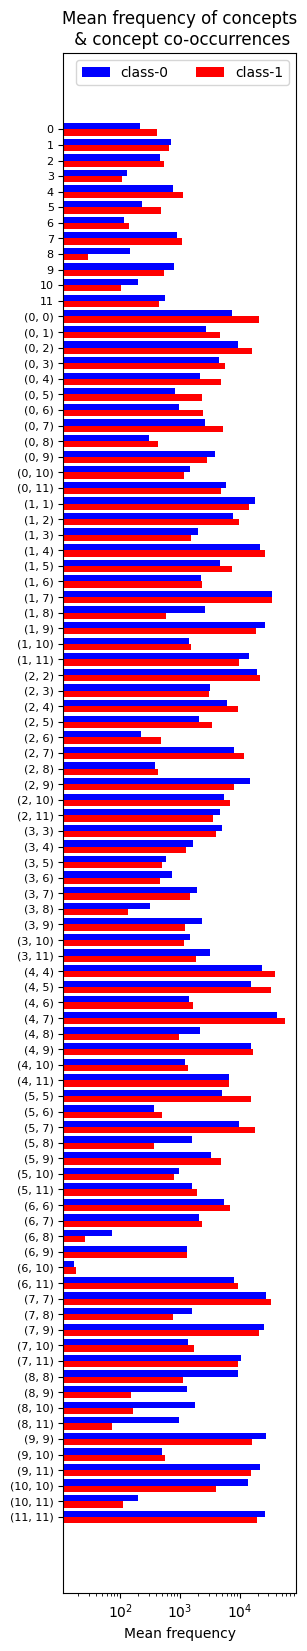

In [28]:
import matplotlib.pyplot as plt

x = np.arange(len(species))  # the label locations
species_sums = {
    "class-0": sum0 / n0,
    "class-1": sum1 / n1
}

width = 0.4  # the width of the bars
multiplier = 0

colors = ["blue", "red"]
plt.figure()
fig, ax = plt.subplots(figsize=(3, 20))
for attribute, measurement in species_sums.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute, align='edge', color=colors[multiplier])
    # ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Mean frequency')
ax.set_title('Mean frequency of concepts\n & concept co-occurrences')
ax.set_yticks(x + width, species, rotation=0, fontsize=8)
ax.legend(loc='upper right', ncols=2)
# ax.set_ylim(0, 250)
# ax.set_xlim()
ax.set_xscale("log")
plt.gca().invert_yaxis()

plt.show()

In [33]:
# n = X.shape[0]
# doc_freq = np.count_nonzero(X, axis=0)
# idf = np.log(n / (1+doc_freq))
# tf = X / np.sum(X, axis=1).reshape(-1,1)
# X_scaled = tf * idf
# X0 = X_scaled[y==0,:]
# X1 = X_scaled[y==1,:]
# EPS = 1e-10

# mu0 = np.mean(X0, axis=0)
# mu1 = np.mean(X1, axis=0)
# log2fc = np.log2((mu1 + EPS)/(mu0 + EPS))


In [34]:
# log2fc

In [35]:
# model.B

In [36]:
# betas

### Get tf-idf scaled values

In [29]:
# X_tfidf = model.training_data
# y = y.astype(int)
# X0_tfidf = X_tfidf[y==0,:]
# X1_tfidf = X_tfidf[y==1,:]
# sum0 = np.sum(X0_tfidf, axis=0)
# sum1 = np.sum(X1_tfidf, axis=0)

In [30]:
# X_tfidf.shape

In [31]:
# X_tfidf

In [32]:
# x = np.arange(len(species))  # the label locations
# species_sums = {
#     "class-0": sum0 / n0,
#     "class-1": sum1 / n1
# }

# width = 0.35  # the width of the bars
# multiplier = 0

# colors = ["blue", "red"]
# plt.figure()
# fig, ax = plt.subplots(figsize=(12, 3))
# for attribute, measurement in species_sums.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute, align='edge', color=colors[multiplier])
#     # ax.bar_label(rects, padding=4)
#     multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Mean frequency')
# ax.set_title('Mean frequency of concepts & concept co-occurrences')
# ax.set_xticks(x + width, species, rotation=90)
# ax.legend(loc='upper left', ncols=2)
# # ax.set_ylim(0, 250)
# # ax.set_xlim()
# ax.set_yscale("linear")

# plt.show()

# Generate model hypotheses

In [35]:
from test_signal import generate_hypotheses_for_model

model = deserialize_model(model_path)
# k12_r5_alpha10000000000.0000_tau1.00
save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected_final/k12r5fc"

# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir, notebook_flag=True)

# save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc"
# print(len(os.listdir(save_dir)))

In [36]:
# from test_signal import generate_join_hypotheses    
# G_dir1 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd"
# # "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc"
# G_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_tnr"
# save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint2"
# #"/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint"
# # generate_join_hypotheses(G_dir1, G_dir2, save_dir, notebook_flag=True)

In [37]:
# save_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_positive"
# print(len(os.listdir(save_dir2)))
# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir2, notebook_flag=True, thresh_style="sign")

In [38]:
# save_dir3 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_decay"
# print(len(os.listdir(save_dir3)))
# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir3, notebook_flag=True, prospect_style="decay")

In [39]:
# save_dir4 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_positive_decay"
# print(len(os.listdir(save_dir4)))
# generate_hypotheses_for_model(model, label_dict, G_dir, save_dir4, notebook_flag=True, thresh_style="sign", prospect_style="decay")

In [40]:
# generate_hypotheses_for_model(model2, label_dict, G_dir, save_dir2, notebook_flag=True)

## let's visualize some examples

In [41]:
ID = 87#312

min/max values: 1.0 2.0
using extended colormap
unique cell types: [1.0, 2.0]


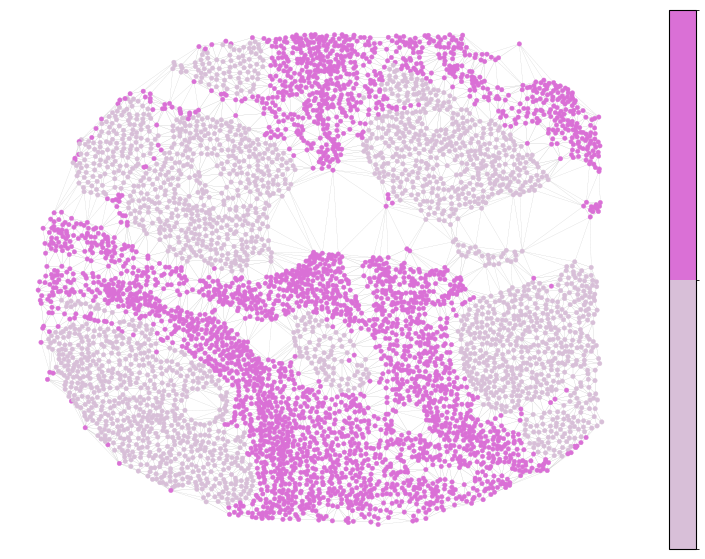

In [42]:
from utils import visualize_cell_graph, deserialize

G_og = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/S" + str(ID) + ".obj"
G_og = deserialize(G_og)

_ = visualize_cell_graph(G_og, key="cell_type", prospect_flag=False, binarized_flag=False, edge_flag=True)

In [44]:
# valid_IDs = []
# for G_id in os.listdir(G_dir):
#     IDX = int(G_id.split(".")[0].split("S")[1])
#     if IDX in label_dict.keys():
#         if label_dict[IDX] == 1:
#             valid_IDs.append(IDX)
# print(sorted(valid_IDs))

class label: 1
min/max values: 0 1


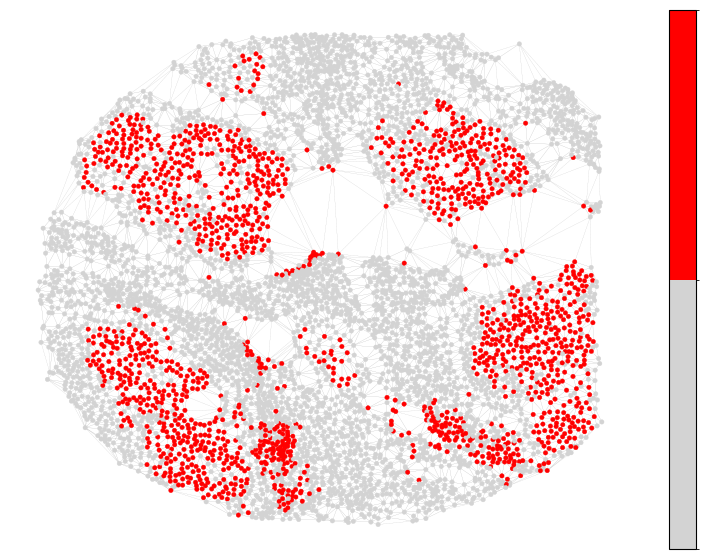

In [45]:
y = label_dict[ID]
print("class label:", y)
save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected_final/k12r5fc"
G_ex = save_dir + "/S" + str(ID) + "_bin.obj"
G_ex = deserialize(G_ex)

_ = visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

In [46]:
# G_ex = save_dir2 + "/S" + str(ID) + "_bin.obj"
# G_ex = deserialize(G_ex)
# visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

In [47]:
# G_ex = save_dir3 + "/S" + str(ID) + "_bin.obj"
# G_ex = deserialize(G_ex)
# visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

In [48]:
# G_ex = save_dir4 + "/S" + str(ID) + "_bin.obj"
# G_ex = deserialize(G_ex)
# visualize_cell_graph(G_ex, key="emb", prospect_flag=True, binarized_flag=True, edge_flag=True)

### let's show cell concepts

In [49]:
from utils import deserialize, deserialize_model
proc_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results_final/k2processors/k12.processor"
proc = deserialize_model(proc_path)

In [50]:
from utils import construct_sprite
G_og = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/S" + str(ID) + ".obj"
G_og = deserialize(G_og)
S = construct_sprite(G_og, proc, key_in="emb", key_out="concept")

min/max values: 0 11
using extended colormap
unique cell types: [0, 1, 2, 3, 4, 5, 6, 7, 9, 11]


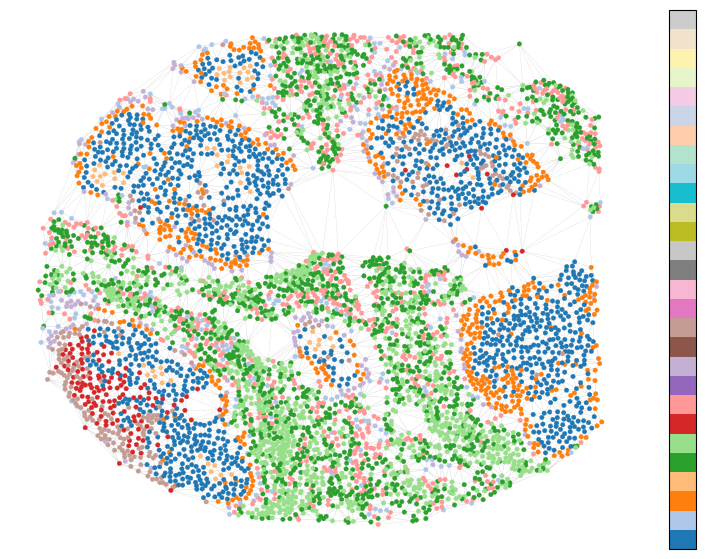

In [51]:
_ = visualize_cell_graph(S, key="concept", node_colors=None, edge_flag=True)

In [52]:
# from test_signal import graph_element_add
# S_shift1 = graph_element_add(S, 1, "concept")
# # visualize_cell_graph(S_shift1, key="concept", node_colors=None)

In [53]:
# from test_signal import graph_hadamard, graph_element_assign
# import numpy as np
# S_cut = graph_hadamard(S_shift1, G_ex, "concept", "emb")
# print([S_cut.nodes[n]["concept"] for n in S_cut.nodes])
# S_drop = graph_element_assign(S_cut, 0, np.nan, "concept")
# print([S_drop.nodes[n]["concept"] for n in S_drop.nodes])
# S_shift2 = graph_element_add(S_drop, -1, "concept")
# print([S_shift2.nodes[n]["concept"] for n in S_shift2.nodes])

In [54]:
# visualize_cell_graph(S_shift2, key="concept", edge_flag=False)

## Combine above cells as a function and save graphs

In [55]:
G_dir1 = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect_final/"

# prospect path
G_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected_final/k12r5fc"

# G_dir2 = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd"
# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint2/"
#"/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint/"

# proc_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results/k2processors/k8.processor"
proc_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/gridsearch_results_final/k2processors/k12.processor"

save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected_final/k12r5fc_concept_overlay"


# save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept"
# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint_concept2"
# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/joint_concept"


In [56]:
from test_signal import generate_join_concepts

# generate_join_concepts(G_dir1, G_dir2, label_dict, proc_path, save_dir, notebook_flag=True)



In [57]:
len(os.listdir(save_dir))

109

### take a look at some

In [58]:
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

In [59]:
# save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_concept_overlay"
save_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected_final/k12r5fc_concept_overlay"

min/max values: 0.0 7.0
using extended colormap
unique cell types: [0, 4, 5, 6, 7, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

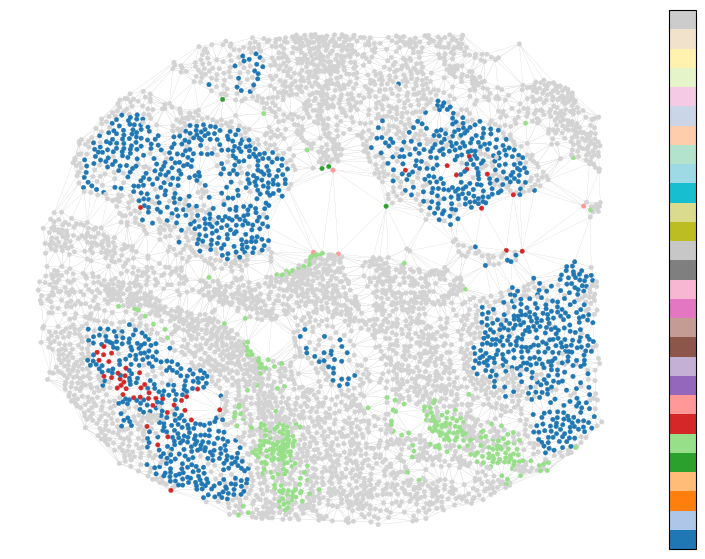

In [60]:
G_path = save_dir + "/S" + str(ID) + "_joint_concept.obj"

# "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept/S3_joint_concept.obj"
G = deserialize(G_path)
_ = visualize_cell_graph(G, key="salient", edge_flag=True)

In [61]:
# G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept"
# for i,G in enumerate(os.listdir(G_dir)):
#     G_id = int(G.split("_")[0].split("S")[1])
#     if label_dict[G_id] == 1:
#         print(G_id, label_dict[G_id])
#         G_path = os.path.join(G_dir, G)
#         G = deserialize(G_path)
#         visualize_cell_graph(G, key="concept", edge_flag=False)
#     if i > 10:
#         break
        

# bar charts per datum

In [62]:
# from utils import visualize_cell_graph, deserialize
# G_path = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/top_auc_low_mrd_concept/S279_joint_concept.obj"
# G = deserialize(G_path)
# visualize_cell_graph(G, key="concept", edge_flag=False)

In [63]:
G.nodes[0].keys()

dict_keys(['voronoi_polygon', 'cell_id', 'center_coord', 'cell_type', 'biomarker_expression', 'AREA_CELL', 'ECCENTRICITY', 'MAJORAXISLENGTH', 'MINORAXISLENGTH', 'PERIMETER', 'emb', 'raw', 'concept', 'salient'])

In [64]:
from test_signal import graph2df
dfG = graph2df(G, ["cell_id", "cell_type", "concept", "salient", "emb", "raw"])

In [65]:
dfG["salbin"] = np.where(np.isnan(dfG['salient']), "non-salient", "salient")


In [66]:
dfG.head()

,node,cell_id,cell_type,concept,salient,emb,raw,salbin
0,0,3398.0,2.0,4,NaN,"[-0.01672722, -0.63217986, -2.7332342, -2.3645...","[7.601771344262561, 7.794182088300973, 7.67151...",non-salient
1,1,3146.0,2.0,1,NaN,"[-0.06646658, -0.3732346, -1.1631167, -1.86134...","[9.37015803610451, 10.513486313735395, 8.21927...",non-salient
2,2,5482.0,2.0,7,NaN,"[0.012474088, -0.44048, -2.3050594, -1.47551, ...","[9.503653088583208, 11.492510442036409, 8.0560...",non-salient
3,3,5396.0,2.0,4,NaN,"[0.002138987, -0.4611844, -2.5437303, -1.57213...","[10.001841267943432, 10.729677688814196, 8.095...",non-salient
4,4,5249.0,2.0,7,NaN,"[0.05948868, -0.4042421, -1.9661019, -1.32448,...","[9.793588951553716, 11.068146054293026, 8.3231...",non-salient


In [67]:
dfG.shape

(5903, 8)

In [68]:
# dfG["concept"]

In [69]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
joint_cmap = colors.ListedColormap(cm.tab20.colors + cm.Pastel2.colors, name='tab40')
joint_cmap.set_bad(color='lightgray') #used to be white

In [70]:
cs = joint_cmap([0,1,2,3,4,5,6,7,8,9,10,11])

<Figure size 640x480 with 0 Axes>

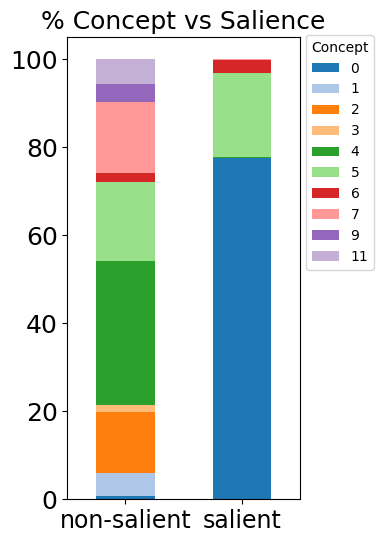

In [71]:
percent = pd.crosstab(dfG.salbin, dfG.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 1.02), loc='upper right', title="Concept")
plt.title("% Concept vs Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

In [72]:
colors_type = ["thistle", "orchid"] # plum
cmap_type = colors.ListedColormap(colors_type)
norm_type = colors.BoundaryNorm(np.arange(0.5,3), cmap_type.N) 

<Figure size 640x480 with 0 Axes>

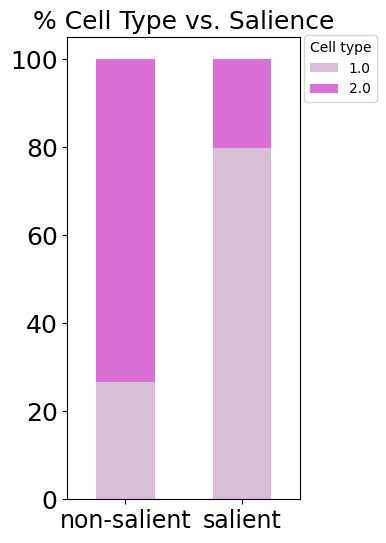

In [73]:
percent = pd.crosstab(dfG.salbin, dfG.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type vs. Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

In [74]:
colors_salcells = ["lightgray", "red"]
cmap_salcells = colors.ListedColormap(colors_salcells)
norm_salcells = colors.BoundaryNorm(np.arange(-0.5,2), cmap_salcells.N) 


<Figure size 640x480 with 0 Axes>

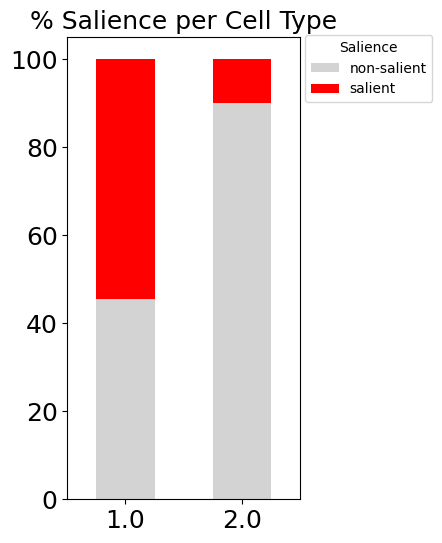

In [75]:
percent = pd.crosstab(dfG.cell_type, dfG.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

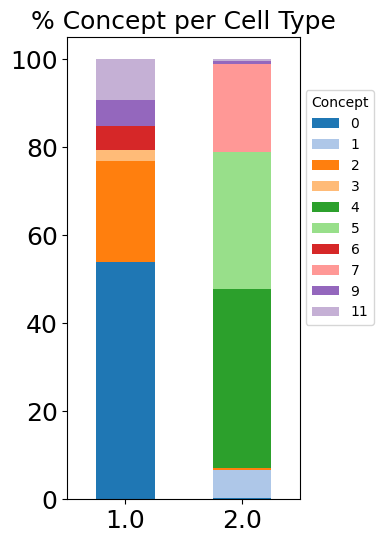

In [76]:
percent = pd.crosstab(dfG.cell_type, dfG.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 0.9), loc='upper right', title="Concept")
plt.title("% Concept per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

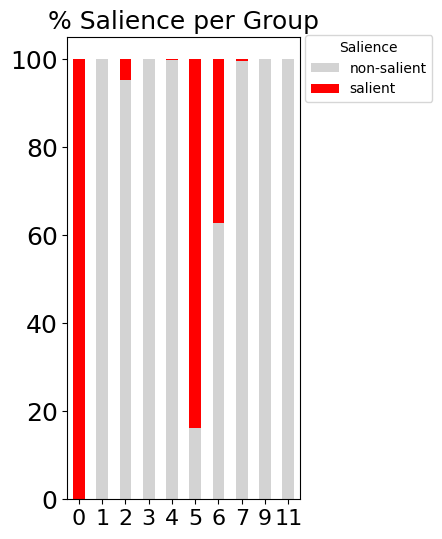

In [ ]:
percent = pd.crosstab(dfG.concept, dfG.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Concept", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

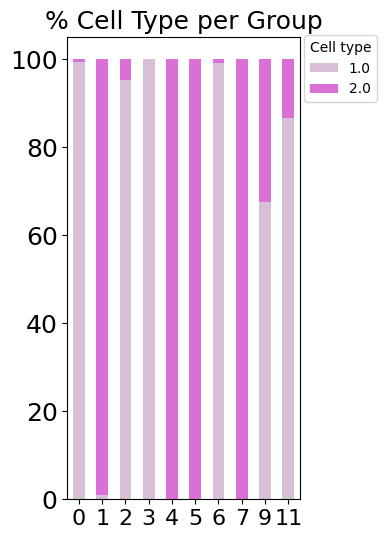

In [92]:
percent = pd.crosstab(dfG.concept, dfG.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type per Concept", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## Bar charts over all of Class-1

In [79]:
# G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_concept_overlay"
G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/prospected_final/k12r5fc_concept_overlay"
cell_dfs = []

for i,G in enumerate(os.listdir(G_dir)):
    G_id = int(G.split("_")[0].split("S")[1])
    if label_dict[G_id] == 1:
        # print(G_id, label_dict[G_id])
        G_path = os.path.join(save_dir, G)
        G = deserialize(G_path)
        
        dfG = graph2df(G, ["cell_id", "cell_type", "concept", "salient", "emb", "raw"])
        dfG["salbin"] = np.where(np.isnan(dfG['salient']), "non-salient", "salient")
        cell_dfs.append(dfG)

dfGs = pd.concat(cell_dfs, ignore_index=True)

In [80]:
dfGs.shape

(613059, 8)

<Figure size 640x480 with 0 Axes>

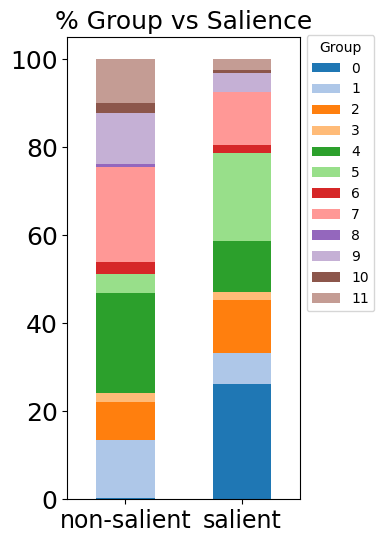

In [83]:
percent = pd.crosstab(dfGs.salbin, dfGs.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 1.02), loc='upper right', title="Group")
plt.title("% Group vs Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

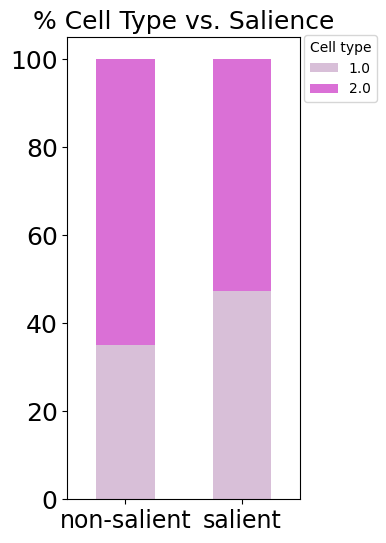

In [84]:
percent = pd.crosstab(dfGs.salbin, dfGs.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type vs. Salience", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

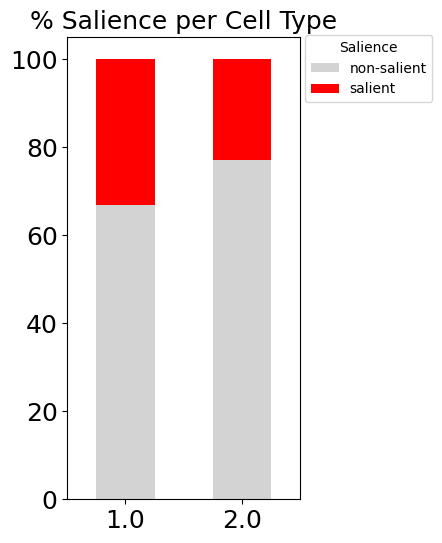

In [85]:
percent = pd.crosstab(dfGs.cell_type, dfGs.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

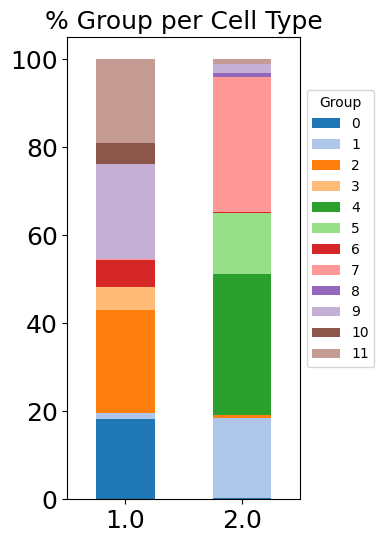

In [86]:
percent = pd.crosstab(dfGs.cell_type, dfGs.concept, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=cs)
ax.legend(bbox_to_anchor=(1.35, 0.9), loc='upper right', title="Group")
plt.title("% Group per Cell Type", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

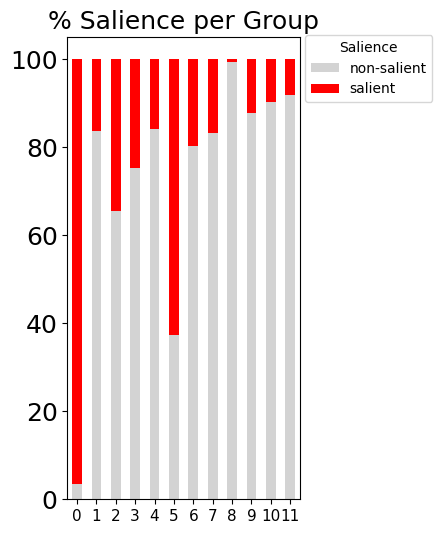

In [98]:
percent = pd.crosstab(dfGs.concept, dfGs.salbin, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_salcells)
ax.legend(bbox_to_anchor=(1.6, 1.02), loc='upper right', title="Salience")
plt.title("% Salience per Group", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

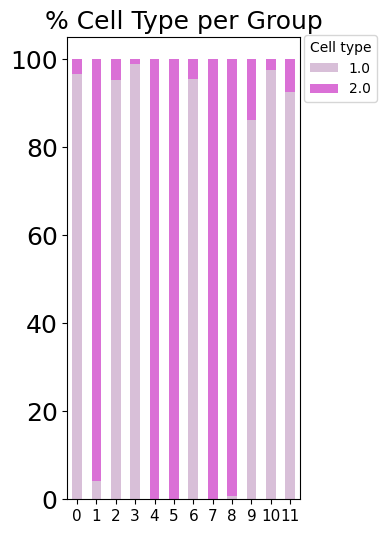

In [97]:
percent = pd.crosstab(dfGs.concept, dfGs.cell_type, normalize='index').mul(100).round(2)
plt.figure()
ax = percent.plot(kind='bar', stacked=True, figsize=(3, 6), color=colors_type)
ax.legend(bbox_to_anchor=(1.36, 1.02), loc='upper right', title="Cell type")
plt.title("% Cell Type per Group", fontsize=18)
# ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=18)
plt.show()

## Statistics

In [215]:
for i in range(9):
    dfG["is_" + str(i)] = np.where(dfG['concept'] == i, 1, 0)


In [223]:
dfG["salbin_num"] = np.where(dfG['salbin'] == "salient", 1, 0)


In [224]:
dfG.head()

,node,cell_id,cell_type,concept,salient,emb,raw,salbin,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,salbin_num
0,0,3398.0,2.0,8,NaN,"[-0.98984975, -0.68301225, -0.0, -0.0, -1.0105...","[7.601771344262561, 7.794182088300973, 7.67151...",non-salient,0,0,0,0,0,0,0,0,1,0
1,1,3146.0,2.0,8,NaN,"[-0.85869443, -0.34044024, -0.0, -1.2899234, -...","[9.37015803610451, 10.513486313735395, 8.21927...",non-salient,0,0,0,0,0,0,0,0,1,0
2,2,5482.0,2.0,4,NaN,"[-0.47870672, -1.0336318, -3.663166, -3.677226...","[9.503653088583208, 11.492510442036409, 8.0560...",non-salient,0,0,0,0,1,0,0,0,0,0
3,3,5396.0,2.0,4,NaN,"[-0.61080706, -0.0, -0.0, -0.0, -2.3791914, -2...","[10.001841267943432, 10.729677688814196, 8.095...",non-salient,0,0,0,0,1,0,0,0,0,0
4,4,5249.0,2.0,6,6.0,"[-0.26028693, -0.83189404, -2.7318215, -3.2538...","[9.793588951553716, 11.068146054293026, 8.3231...",salient,0,0,0,0,0,0,1,0,0,1


In [229]:
from scipy.stats import chi2_contingency
import scipy.stats as ss

for i in range(9):
    table = pd.crosstab(dfG.salbin_num, dfG["is_" + str(i)])
    result_test = chi2_contingency(table)
    print(result_test)
    
print()
print("Combined")
print()
table = pd.crosstab(dfG.salbin_num, dfG["concept"])
result_test = chi2_contingency(table)
print(result_test)

table = pd.crosstab(dfG.salbin_num, dfG["cell_type"])
result_test = chi2_contingency(table)
print(result_test)

Chi2ContingencyResult(statistic=483.5005229184181, pvalue=3.6986514373611057e-107, dof=1, expected_freq=array([[3820.58783669,  228.41216331],
       [1749.41216331,  104.58783669]]))
Chi2ContingencyResult(statistic=340.21889528902807, pvalue=5.717407497217107e-76, dof=1, expected_freq=array([[3534.55819075,  514.44180925],
       [1618.44180925,  235.55819075]]))
Chi2ContingencyResult(statistic=383.34808830834794, pvalue=2.322940611022166e-85, dof=1, expected_freq=array([[3544.16110452,  504.83889548],
       [1622.83889548,  231.16110452]]))
Chi2ContingencyResult(statistic=700.2685382385702, pvalue=2.6140191584895193e-154, dof=1, expected_freq=array([[3835.67812976,  213.32187024],
       [1756.32187024,   97.67812976]]))
Chi2ContingencyResult(statistic=249.63495306027636, pvalue=3.1190578662820233e-56, dof=1, expected_freq=array([[3704.66694901,  344.33305099],
       [1696.33305099,  157.66694901]]))
Chi2ContingencyResult(statistic=145.73241544694758, pvalue=1.4853863843375131e-33,

In [239]:
def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)
            
        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True
    
        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]
            
        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [250]:
for i in range(9):
    result_test = cramers_corrected_stat(dfG.salbin_num, dfG["is_" + str(i)])
    print("cramer corr (concept i==" + str(i) + " vs salience):", result_test)
    result_test = cramers_corrected_stat(dfG.cell_type, dfG["is_" + str(i)])
    print("cramer corr (concept i==" + str(i) + " vs cell type):", result_test)
    print()
    

print()
result_test = cramers_corrected_stat(dfG.salbin_num, dfG["concept"])
print("cramer corr (concept vs salience):", result_test)

result_test = cramers_corrected_stat(dfG.cell_type, dfG["concept"])
print("cramer corr (cell type vs concept):", result_test)

result_test = cramers_corrected_stat(dfG.salbin_num, dfG.cell_type)
print("cramer corr (cell type vs salience):", result_test)

cramer corr (concept i==0 vs salience): 0.286715
cramer corr (concept i==0 vs cell type): 0.051286

cramer corr (concept i==1 vs salience): 0.240289
cramer corr (concept i==1 vs cell type): 0.049969

cramer corr (concept i==2 vs salience): 0.255078
cramer corr (concept i==2 vs cell type): 0.387285

cramer corr (concept i==3 vs salience): 0.345027
cramer corr (concept i==3 vs cell type): 0.095592

cramer corr (concept i==4 vs salience): 0.205905
cramer corr (concept i==4 vs cell type): 0.202985

cramer corr (concept i==5 vs salience): 0.157424
cramer corr (concept i==5 vs cell type): 0.263835

cramer corr (concept i==6 vs salience): 0.652549
cramer corr (concept i==6 vs cell type): 0.308967

cramer corr (concept i==7 vs salience): 0.15271
cramer corr (concept i==7 vs cell type): 0.258538

cramer corr (concept i==8 vs salience): 0.226063
cramer corr (concept i==8 vs cell type): 0.188069


cramer corr (concept vs salience): 0.877616
cramer corr (cell type vs concept): 0.645094
cramer corr